# Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

## EDA

columns with null values

In [3]:
nans = pd.concat([df_train.isnull().sum(),
                  df_train.isnull().sum()/
                  df_train.shape[0], df_test.isnull().sum(),
                  df_test.isnull().sum()/
                  df_test.shape[0]], axis=1,
                 keys=['Train', 'Percentage', 'Test', 'Percentage'],
                sort=False)
print(nans[nans.sum(axis=1) > 0].sort_values(by="Test", ascending=False))

              Train  Percentage    Test  Percentage
PoolQC         1453    0.995205  1456.0    0.997944
MiscFeature    1406    0.963014  1408.0    0.965045
Alley          1369    0.937671  1352.0    0.926662
Fence          1179    0.807534  1169.0    0.801234
FireplaceQu     690    0.472603   730.0    0.500343
LotFrontage     259    0.177397   227.0    0.155586
GarageFinish     81    0.055479    78.0    0.053461
GarageQual       81    0.055479    78.0    0.053461
GarageCond       81    0.055479    78.0    0.053461
GarageYrBlt      81    0.055479    78.0    0.053461
GarageType       81    0.055479    76.0    0.052090
BsmtCond         37    0.025342    45.0    0.030843
BsmtExposure     38    0.026027    44.0    0.030158
BsmtQual         37    0.025342    44.0    0.030158
BsmtFinType1     37    0.025342    42.0    0.028787
BsmtFinType2     38    0.026027    42.0    0.028787
MasVnrType        8    0.005479    16.0    0.010966
MasVnrArea        8    0.005479    15.0    0.010281
MSZoning    

categorical features

In [4]:
for idx in df_train.select_dtypes(include="object").columns:
    print("{}: {}\n".format(idx, set(df_train[idx])))

MSZoning: {'RH', 'RM', 'C (all)', 'RL', 'FV'}

Street: {'Grvl', 'Pave'}

Alley: {nan, 'Grvl', 'Pave'}

LotShape: {'IR2', 'IR1', 'Reg', 'IR3'}

LandContour: {'HLS', 'Lvl', 'Low', 'Bnk'}

Utilities: {'AllPub', 'NoSeWa'}

LotConfig: {'CulDSac', 'FR3', 'Corner', 'FR2', 'Inside'}

LandSlope: {'Sev', 'Mod', 'Gtl'}

Neighborhood: {'NAmes', 'SWISU', 'BrDale', 'StoneBr', 'NPkVill', 'NridgHt', 'Timber', 'Edwards', 'Sawyer', 'CollgCr', 'OldTown', 'Gilbert', 'ClearCr', 'MeadowV', 'Crawfor', 'Blmngtn', 'Veenker', 'BrkSide', 'Blueste', 'SawyerW', 'IDOTRR', 'Somerst', 'NWAmes', 'NoRidge', 'Mitchel'}

Condition1: {'RRNn', 'PosA', 'RRAn', 'Norm', 'RRNe', 'Artery', 'RRAe', 'PosN', 'Feedr'}

Condition2: {'RRNn', 'PosA', 'RRAn', 'Norm', 'Artery', 'RRAe', 'PosN', 'Feedr'}

BldgType: {'2fmCon', 'Twnhs', '1Fam', 'TwnhsE', 'Duplex'}

HouseStyle: {'1Story', '2Story', '1.5Unf', 'SLvl', '2.5Fin', '2.5Unf', 'SFoyer', '1.5Fin'}

RoofStyle: {'Gambrel', 'Gable', 'Shed', 'Mansard', 'Hip', 'Flat'}

RoofMatl: {'Roll', 

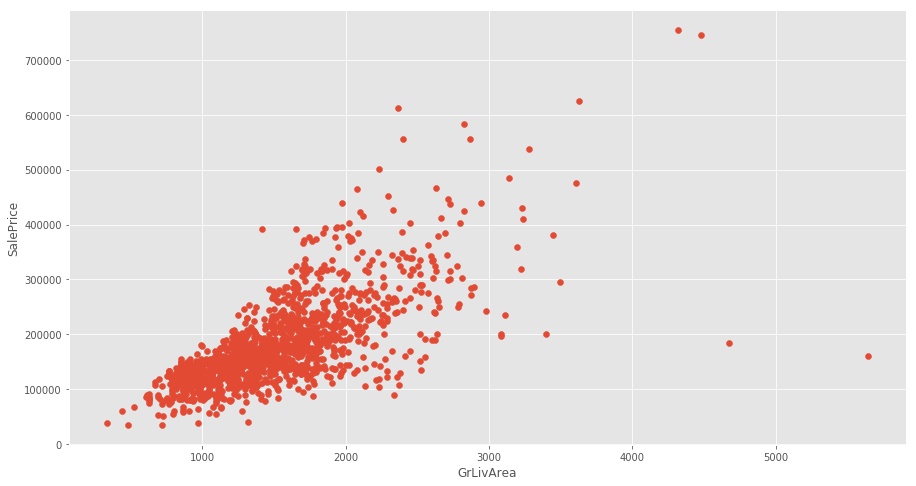

In [5]:
plt.figure(figsize=(15,8))
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

```there are 2 big houses with very low price.```

In [6]:
df_train.drop(df_train[(df_train["GrLivArea"]>4000)&
                       (df_train["SalePrice"]<300000)].index,inplace=True)
df_full = pd.concat([df_train,df_test], sort=False)

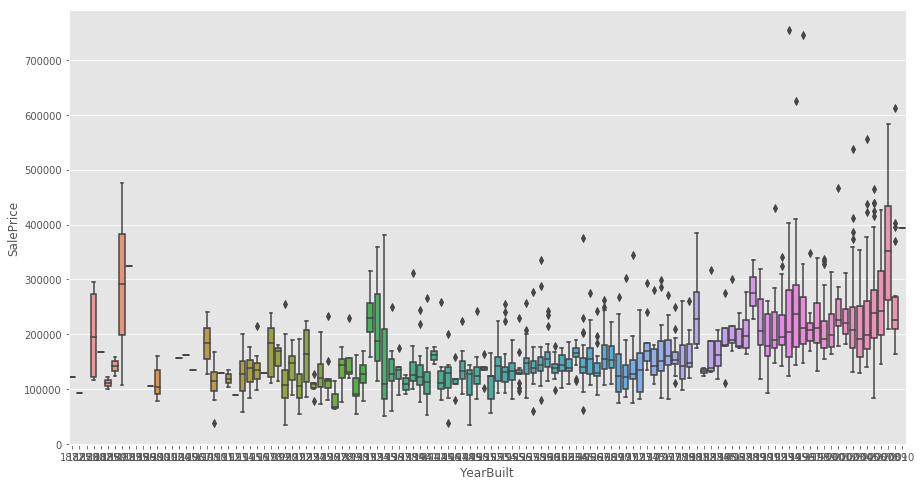

In [7]:
plt.figure(figsize=(15, 8))
sns.boxplot(df_full.YearBuilt, df_full.SalePrice)
plt.show()

```prices increase over years```

In [8]:
df_train["SalePrice"].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

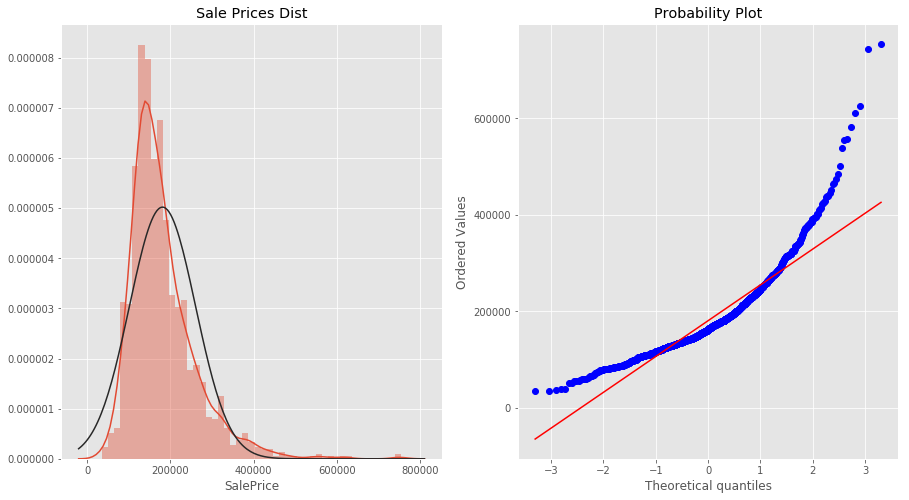

Skewness: 1.881296
Kurtosis: 6.523067


In [9]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Sale Prices Dist")
sns.distplot(df_train["SalePrice"], fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(df_train["SalePrice"], plot=plt)
plt.show()

print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

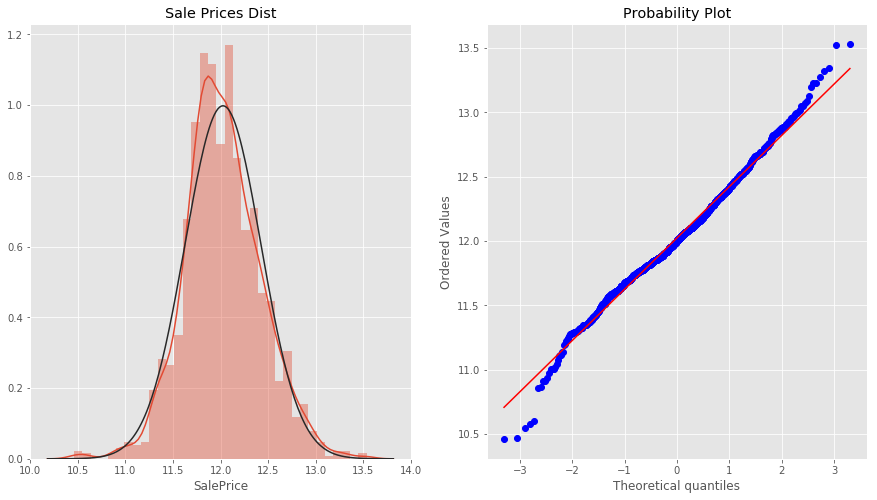

Skewness: 0.121568
Kurtosis: 0.804764


In [10]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Sale Prices Dist")
sns.distplot(np.log(df_train["SalePrice"]), fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(np.log(df_train["SalePrice"]), plot=plt)
plt.show()

print("Skewness: %f" % np.log(df_train["SalePrice"]).skew())
print("Kurtosis: %f" % np.log(df_train["SalePrice"]).kurt())

``` seems like using log values is closer to normal distribution```

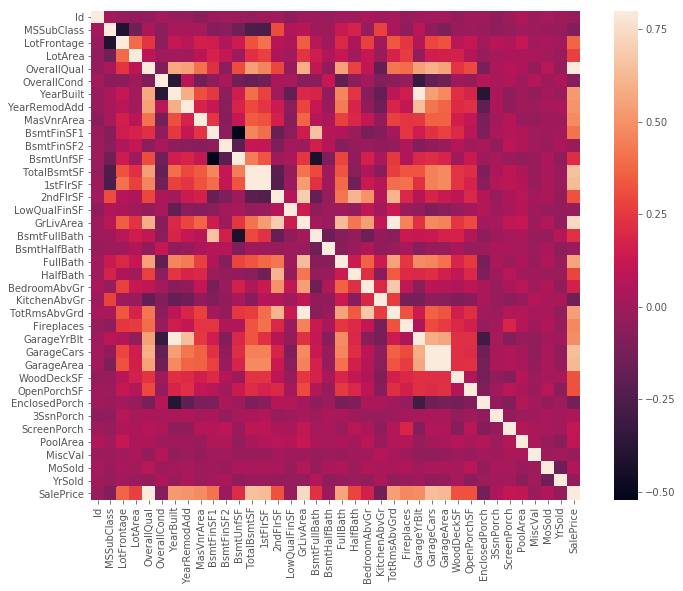

In [11]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

```values related to garage are correlated. alse basement finished area and first floor```

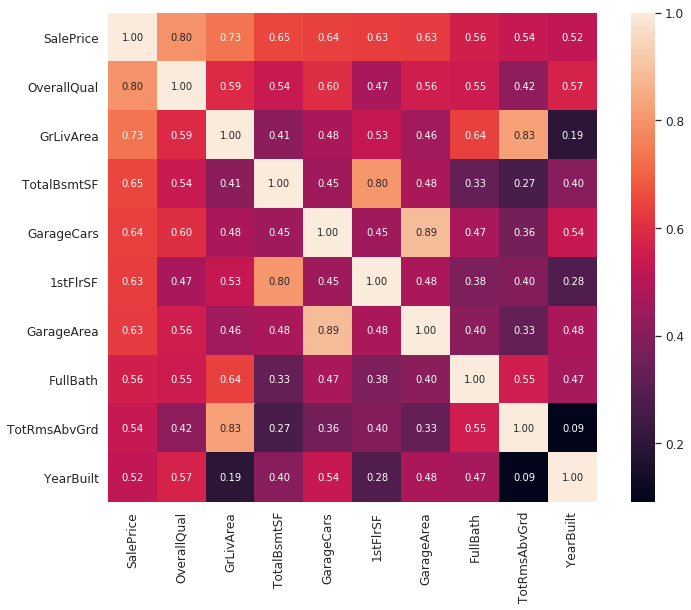

In [12]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.1)
plt.figure(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

<Figure size 1152x648 with 0 Axes>

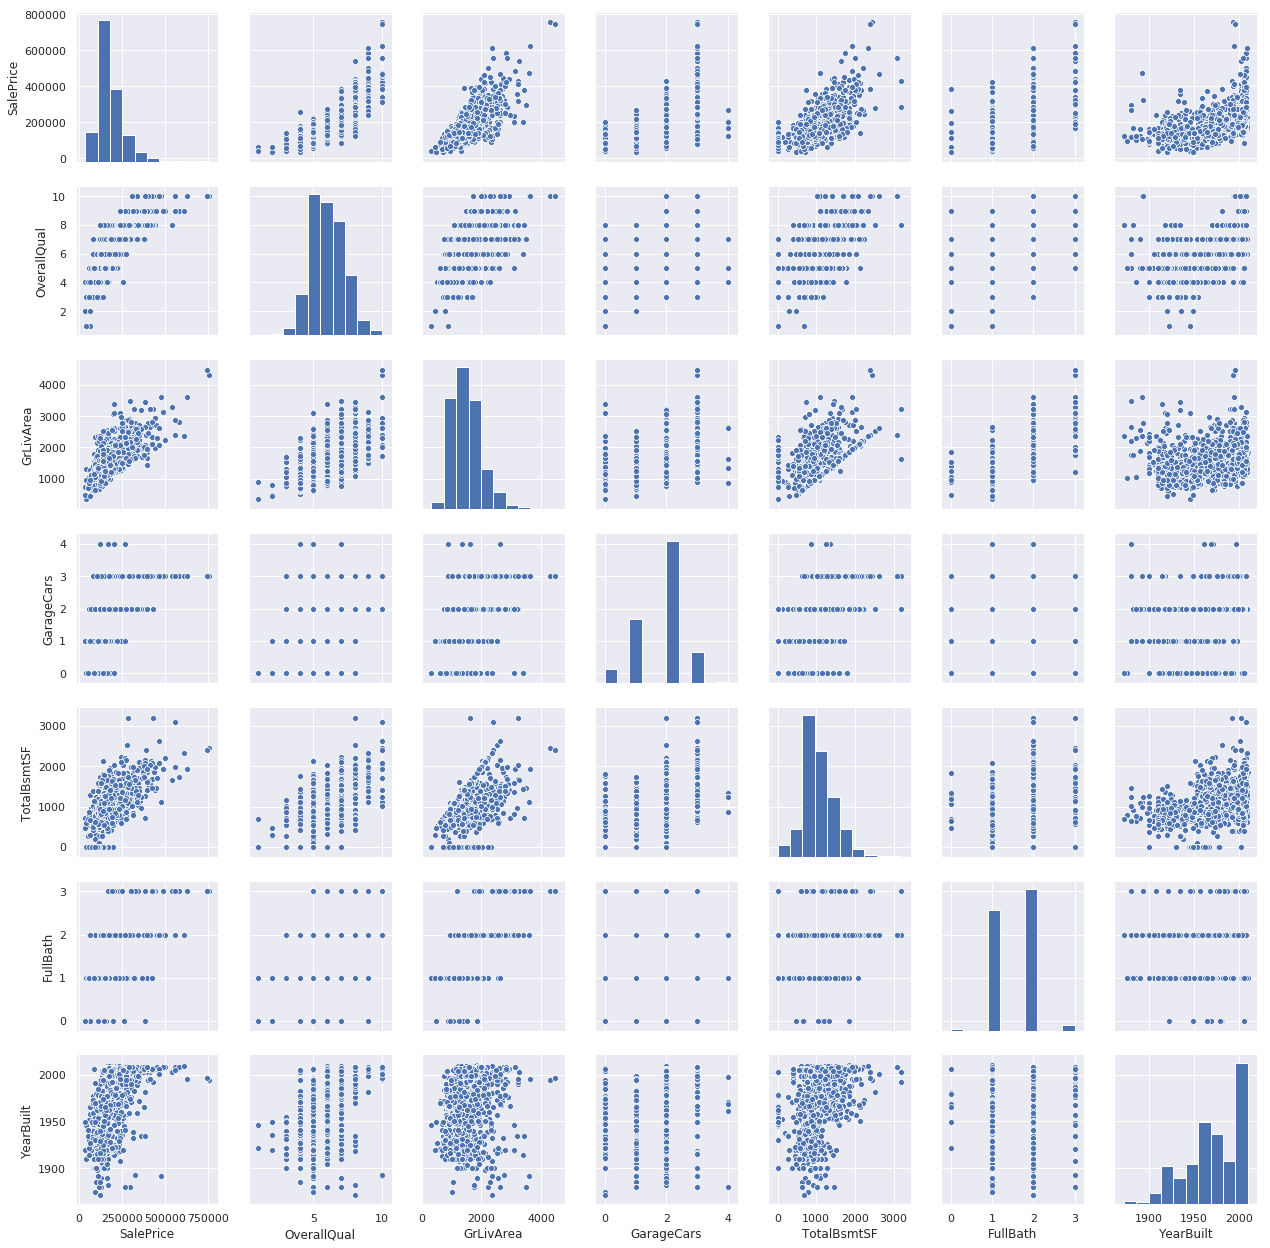

In [13]:
sns.set()
plt.figure(figsize=(16, 9))
cols = ['SalePrice', 'OverallQual','GrLivArea', 'GarageCars',
        'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height=2.5)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


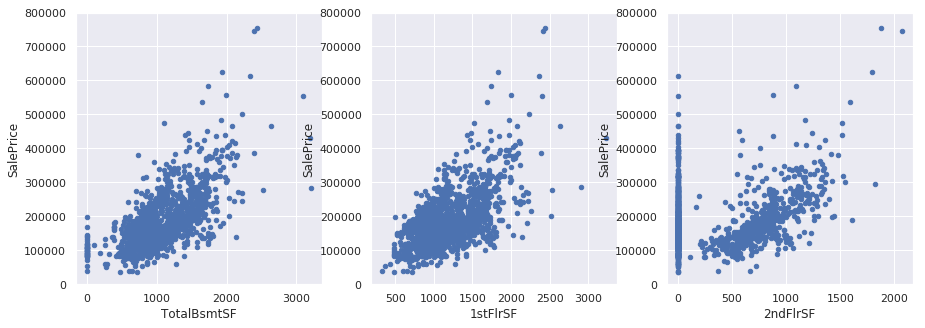

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
data_total = pd.concat([df_train['SalePrice'],
                        df_train['TotalBsmtSF']], axis=1)
data_total.plot.scatter(x='TotalBsmtSF', y='SalePrice',
                        ylim=(0, 800000), ax=ax1)
data1 = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
data1.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax2)
data2 = pd.concat([df_train['SalePrice'], df_train['2ndFlrSF']], axis=1)
data2.plot.scatter(x='2ndFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax3)
plt.show()

In [15]:
# df_full.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
df_full['TotalBsmtSF'] = df_full['TotalBsmtSF'].fillna(0)
df_full['1stFlrSF'] = df_full['1stFlrSF'].fillna(0)
df_full['2ndFlrSF'] = df_full['2ndFlrSF'].fillna(0)
df_full['TotalHouse'] = df_full['TotalBsmtSF']+df_full['1stFlrSF']+df_full['2ndFlrSF']
# df_full.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
# df_full.drop(['GarageArea'], axis=1, inplace=True) 

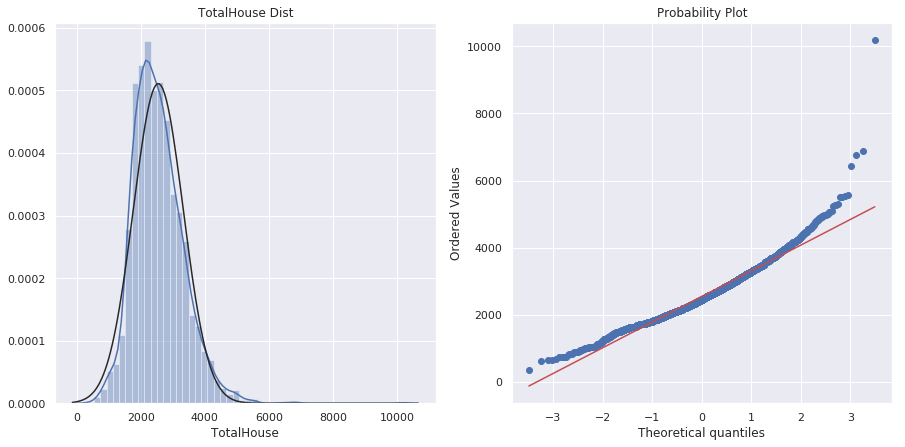

Skewness: 1.009676
Kurtosis: 4.142056


In [16]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("TotalHouse Dist")
sns.distplot(df_full['TotalHouse'], fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(df_full['TotalHouse'], plot=plt)
plt.show()

print("Skewness: %f" % df_full['TotalHouse'].skew())
print("Kurtosis: %f" % df_full['TotalHouse'].kurt())

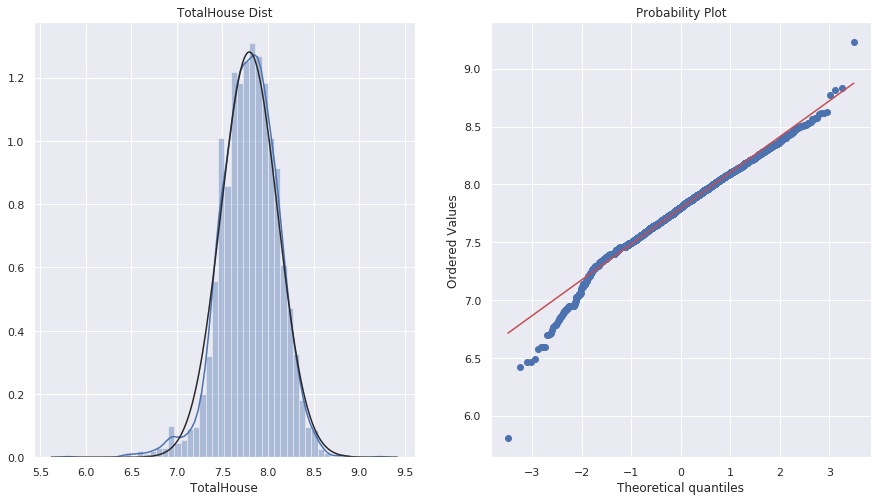

Skewness: -0.430549
Kurtosis: 1.488561


In [17]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("TotalHouse Dist")
sns.distplot(np.log(df_full["TotalHouse"]), fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(np.log(df_full["TotalHouse"]), plot=plt)
plt.show()

print("Skewness: %f" % np.log(df_full["TotalHouse"]).skew())
print("Kurtosis: %f" % np.log(df_full["TotalHouse"]).kurt())

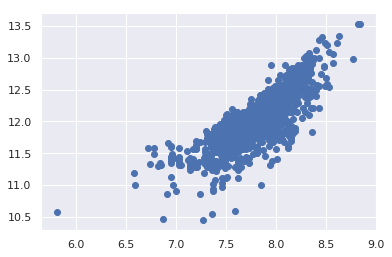

In [18]:
sf = np.log(df_full['TotalHouse'])
sp = np.log(df_full['SalePrice'])
plt.scatter(sf[sf > 0], sp[sf > 0])
plt.show()

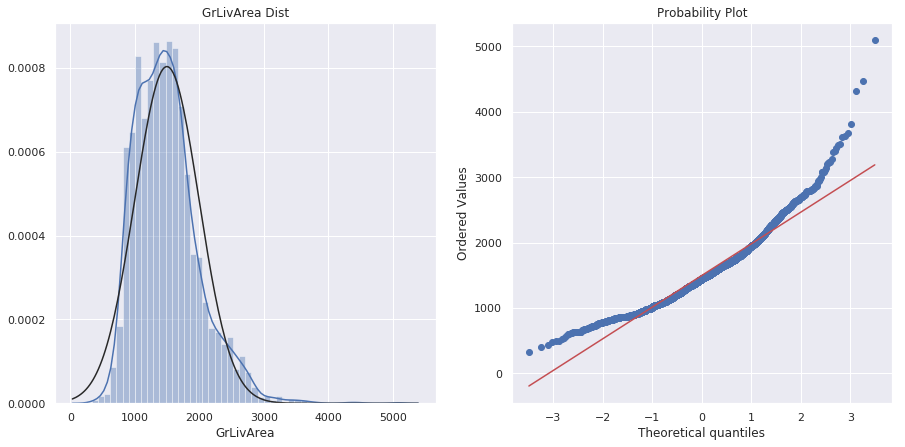

Skewness: 1.069300
Kurtosis: 2.456625


In [19]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("GrLivArea Dist")
sns.distplot(df_full['GrLivArea'], fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(df_full['GrLivArea'], plot=plt)
plt.show()

print("Skewness: %f" % df_full['GrLivArea'].skew())
print("Kurtosis: %f" % df_full['GrLivArea'].kurt())

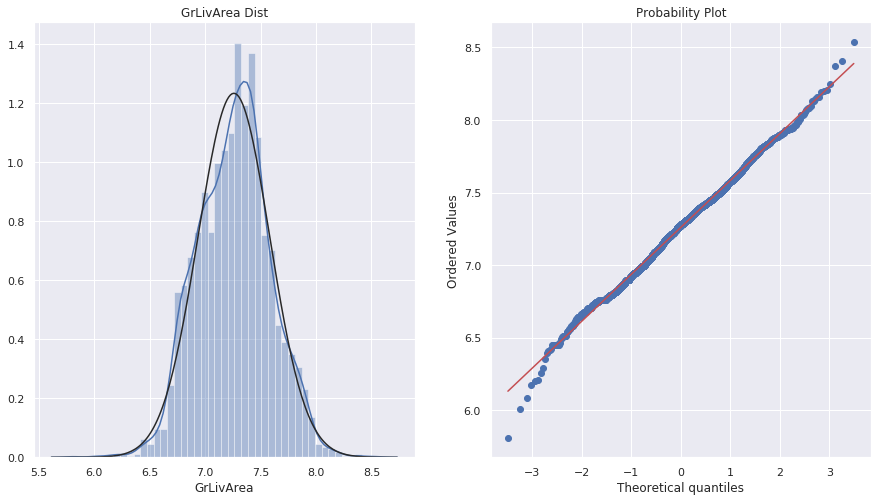

Skewness: -0.022845
Kurtosis: 0.104123


In [20]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("GrLivArea Dist")
sns.distplot(np.log(df_full["GrLivArea"]), fit=stats.norm)

plt.subplot(1, 2, 2)
stats.probplot(np.log(df_full["GrLivArea"]), plot=plt)
plt.show()

print("Skewness: %f" % np.log(df_full["GrLivArea"]).skew())
print("Kurtosis: %f" % np.log(df_full["GrLivArea"]).kurt())

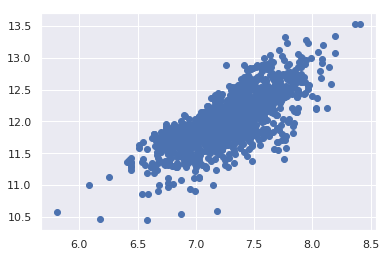

In [21]:
sf = np.log(df_full['GrLivArea'])
sp = np.log(df_full['SalePrice'])
plt.scatter(sf[sf > 0], sp[sf > 0])
plt.show()

## Treat missing values

In [22]:
df_full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean',
                                                        'median','count'])


LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        46.900000   43.0    20
Blueste        27.300000   24.0    10
BrDale         21.500000   21.0    30
BrkSide        55.789474   51.0    95
ClearCr        88.150000   80.5    20
CollgCr        71.336364   70.0   220
Crawfor        69.951807   70.0    83
Edwards        65.153409   64.5   176
Gilbert        74.207207   64.0   111
IDOTRR         62.241379   60.0    87
MeadowV        25.606061   21.0    33
Mitchel        75.144444   74.0    90
NAmes          75.210667   73.0   375
NPkVill        28.142857   24.0    21
NWAmes         81.517647   80.0    85
NoRidge        91.629630   89.0    54
NridgHt        84.184049   92.0   163
OldTown        61.777293   60.0   229
SWISU          59.068182   60.0    44
Sawyer         74.551020   72.0    98
SawyerW        70.669811   67.0   106
Somerst        64.549383   72.5   162
StoneBr        62.173913   60.0    46
Timber         81.157895   82.0    57
Veenker        72.000000   80.0    16

In [23]:
df_full["LotAreaCut"] = pd.qcut(df_full.LotArea,10)

In [24]:
df_full.groupby(['LotAreaCut'])[['LotFrontage']].agg(
    ['mean','median','count'])

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4921.8]    35.741036   34.0   251
(4921.8, 7007.2]      55.460674   52.0   267
(7007.2, 7949.0]      62.959839   62.0   249
(7949.0, 8740.4]      67.113725   65.0   255
(8740.4, 9452.0]      69.959184   70.0   245
(9452.0, 10148.8]     73.988235   75.0   255
(10148.8, 11000.0]    73.636364   75.0   253
(11000.0, 12196.8]    83.371681   82.0   226
(12196.8, 14285.8]    84.973684   85.0   228
(14285.8, 215245.0]   92.846535   90.0   202

In [25]:
df_full['LotFrontage'] = df_full.groupby(
    ['LotAreaCut','Neighborhood'])['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# for remaining null values
df_full['LotFrontage'] = df_full.groupby(
    ['LotAreaCut'])['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [26]:
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars",
      "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    df_full[col].fillna(0, inplace=True)


In [27]:
cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu",
         "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt",
         "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual",
         "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    df_full[col].fillna("None", inplace=True)


In [28]:
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities",
         "Functional", "Electrical", "KitchenQual", "SaleType",
         "Exterior1st", "Exterior2nd"]
for col in cols2:
    df_full[col].fillna(df_full[col].mode()[0], inplace=True)


In [29]:
cols3 = ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]

NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath",
          "BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt",
          "YearRemodAdd","LowQualFinSF","GarageYrBlt"]

for col in cols3:
    df_full["nf{}".format(col)] = df_full[col].replace("None", 0)

for col in NumStr:
    df_full[col]=df_full[col].astype(str)
    
    

In [30]:
df_full.isnull().sum()[df_full.isnull().sum()>0]

SalePrice    1459
dtype: int64

In [31]:
int_cols = ["BsmtFullBath", "BsmtHalfBath", "BedroomAbvGr"]
for col in int_cols:
    df_full[col].astype(float)

In [32]:
df_full.groupby(['MSSubClass'])[['SalePrice']].agg(
    ['mean','median','count']).sort_values(by=(
    "SalePrice","median"), ascending=False)

SalePrice                
                     mean    median count
MSSubClass                               
60          240403.542088  216000.0   297
120         200779.080460  192000.0    87
80          169736.551724  166500.0    58
75          192437.500000  163500.0    16
20          185224.811567  159250.0   536
70          166772.416667  156000.0    60
160         138647.380952  146000.0    63
40          156125.000000  142500.0     4
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52
50          143302.972222  132000.0   144
190         129613.333333  128250.0    30
45          108591.666667  107500.0    12
30           95829.724638   99900.0    69
180         102300.000000   88500.0    10
150                   NaN       NaN     0

```now by studying medians we group them into 6 groups and 150 to the mode
       180 -> 1
       30, 45 -> 2
       190, 50, 90 -> 3
       85, 40, 160 -> 4
       70, 20, 75, 80, 150 -> 5
       120, 60 -> 6```

In [33]:
df_full["nfMSSubClass"] = df_full.MSSubClass.map({'180':1,
                                            '30':2, '45':2, 
                                            '190':3, '50':3, '90':3, 
                                            '85':4, '40':4, '160':4, 
                                            '70':5, '20':5, '75':5,
                                            '80':5, '150':5,
                                            '120': 6, '60':6})

In [34]:
df_full["nfMSZoning"] = df_full.MSZoning.map({'C (all)':1, 'RH':2,
                                              'RM':2, 'RL':3, 'FV':4})
    
df_full["nfNeighborhood"] = df_full.Neighborhood.map({'MeadowV':1,
                                                      'IDOTRR':2,
                                                      'BrDale':2,
                                                      'OldTown':3,
                                                      'Edwards':3,
                                                      'BrkSide':3,
                                                      'Sawyer':4,
                                                      'Blueste':4,
                                                      'SWISU':4,
                                                      'NAmes':4,
                                                      'NPkVill':5,
                                                      'Mitchel':5,
                                                      'SawyerW':6,
                                                      'Gilbert':6,
                                                      'NWAmes':6,
                                                      'Blmngtn':7,
                                                      'CollgCr':7,
                                                      'ClearCr':7,
                                                      'Crawfor':7,
                                                      'Veenker':8,
                                                      'Somerst':8,
                                                      'Timber':8,
                                                      'StoneBr':9,
                                                      'NoRidge':10,
                                                      'NridgHt':10})
    
df_full["nfCondition1"] = df_full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
df_full["nfBldgType"] = df_full.BldgType.map({'2fmCon':1,'Duplex':1,
                                              'Twnhs':1, '1Fam':2,
                                              'TwnhsE':2})
    
df_full["nfHouseStyle"] = df_full.HouseStyle.map({'1.5Unf':1,'1.5Fin':2,
                                                  '2.5Unf':2, 'SFoyer':2,
                                                  '1Story':3, 'SLvl':3,
                                                  '2Story':4, '2.5Fin':4})
    
df_full["nfExterior1st"]=df_full.Exterior1st.map({'BrkComm':1,'AsphShn':2,
                                                  'CBlock':2, 'AsbShng':2,
                                                  'WdShing':3,'Wd Sdng':3,
                                                  'MetalSd':3, 'Stucco':3,
                                                  'HdBoard':3,'BrkFace':4,
                                                  'Plywood':4,'VinylSd':5,
                                                  'CemntBd':6,'Stone':7,
                                                  'ImStucc':7})

df_full["nfMasVnrType"] = df_full.MasVnrType.map({'BrkCmn':1, 'None':1,
                                                  'BrkFace':2, 'Stone':3})

df_full["nfExterQual"] = df_full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3,
                                                'Ex':4})
    
df_full["nfFoundation"] = df_full.Foundation.map({'Slab':1,'BrkTil':2,
                                               'CBlock':2, 'Stone':2,
                                               'Wood':3, 'PConc':4})
    
df_full["nfBsmtQual"] = df_full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3,
                                              'Gd':4, 'Ex':5})
    
df_full["nfBsmtExposure"] = df_full.BsmtExposure.map({'None':1, 'No':2,
                                                      'Av':3, 'Mn':3,
                                                      'Gd':4})
    
df_full["nfHeating"] = df_full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2,
                                          'OthW':3, 'GasW':4, 'GasA':5})

df_full["nfHeatingQC"] = df_full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3,
                                                'Gd':4, 'Ex':5})
    
df_full["nfKitchenQual"] = df_full.KitchenQual.map({'Fa':1, 'TA':2,
                                                    'Gd':3, 'Ex':4})
    
df_full["nfFunctional"] = df_full.Functional.map({'Maj2':1, 'Maj1':2,
                                                  'Min1':2, 'Min2':2,
                                                  'Mod':2, 'Sev':2,
                                                  'Typ':3})
    
df_full["nfFireplaceQu"] = df_full.FireplaceQu.map({'None':1, 'Po':1,
                                                    'Fa':2, 'TA':3,
                                                    'Gd':4, 'Ex':5})
    
df_full["nfGarageType"] = df_full.GarageType.map({'CarPort':1, 'None':1,
                                                  'Detchd':2,'2Types':3,
                                                  'Basment':3,'Attchd':4,
                                                  'BuiltIn':5})
    
df_full["nfGarageFinish"] = df_full.GarageFinish.map({'None':1, 'Unf':2,
                                                      'RFn':3, 'Fin':4})
    
df_full["nfPavedDrive"] = df_full.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
df_full["nfSaleType"] = df_full.SaleType.map({'COD':1, 'ConLD':1,
                                              'ConLI':1, 'ConLw':1,
                                              'Oth':1, 'WD':1,'CWD':2,
                                              'Con':3, 'New':3})
    
df_full["nfSaleCondition"] = df_full.SaleCondition.map({'AdjLand':1,
                                                        'Abnorml':2,
                                                        'Alloca':2,
                                                        'Family':2,
                                                        'Normal':3,
                                                        'Partial':4})

In [35]:
y_train = df_train["SalePrice"]
df_full.drop("LotAreaCut", axis=1, inplace=True)
df_full.drop(['SalePrice'], axis=1, inplace=True)

In [36]:
zoScaler = MinMaxScaler()

for col in cols3:
    df_full["nf{}".format(col)] = zoScaler.fit_transform(
        df_full[["nf{}".format(col)]])

In [37]:
cols4 = ["GrLivArea", "TotalHouse"]
for col in cols4:
    df_full["log_{}".format(col)] = np.log(df_full[col])

### create pipeline

In [38]:
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=1.2):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

rScaler = RobustScaler()

In [39]:
class add_feature(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        
        X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
        X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
        X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
        X["+_nfMSZoning_TotalHouse"] = X["nfMSZoning"] * X["TotalHouse"]
        X["+_nfMSZoning_OverallQual"] = X["nfMSZoning"] + X["OverallQual"]
        X["+_nfMSZoning_YearBuilt"] = X["nfMSZoning"] + X["YearBuilt"]
        X["+_nfNeighborhood_TotalHouse"] = X["nfNeighborhood"] * X["TotalHouse"]
        X["+_nfNeighborhood_OverallQual"] = X["nfNeighborhood"] + X["OverallQual"]
        X["+_nfNeighborhood_YearBuilt"] = X["nfNeighborhood"] + X["YearBuilt"]
        X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
        X["-_nfFunctional_TotalHouse"] = X["nfFunctional"] * X["TotalHouse"]
        X["-_nfFunctional_OverallQual"] = X["nfFunctional"] + X["OverallQual"]
        X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
        X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
        X["-_nfCondition1_TotalHouse"] = X["nfCondition1"] * X["TotalHouse"]
        X["-_nfCondition1_OverallQual"] = X["nfCondition1"] + X["OverallQual"]
        X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
        X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
        X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
        X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X[
            "OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]


        X["+_log_TotalHouse_OverallQual"] = X["log_TotalHouse"] * X["OverallQual"]
        X["+_log_GrLivArea_OverallQual"] = X["log_GrLivArea"] * X["OverallQual"]
        X["+_nfMSZoning_log_TotalHouse"] = X["nfMSZoning"] * X["log_TotalHouse"]
        X["+_nfNeighborhood_log_TotalHouse"] = X["nfNeighborhood"] * X["log_TotalHouse"]
        X["-_nfFunctional_log_TotalHouse"] = X["nfFunctional"] * X["log_TotalHouse"]
        X["-_log_TotalHouse_LotArea"] = X["log_TotalHouse"] + X["LotArea"]
        X["-_nfCondition1_log_TotalHouse"] = X["nfCondition1"] * X["log_TotalHouse"]


        
        return X

In [40]:
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature()),
    ('skew_dummies', skew_dummies(skew=1.2)),
    ])

In [41]:
df_full_p = pipe.fit_transform(df_full)
df_full_p.shape

(2917, 439)

In [42]:
n_train = df_train.shape[0]
X_train = df_full_p[:n_train]
X_test = df_full_p[n_train:]

X_train_sc = rScaler.fit(X_train).transform(X_train)
y_log = np.log(y_train)
X_test_sc = rScaler.transform(X_test)


important features in lasso:  (78, 1)


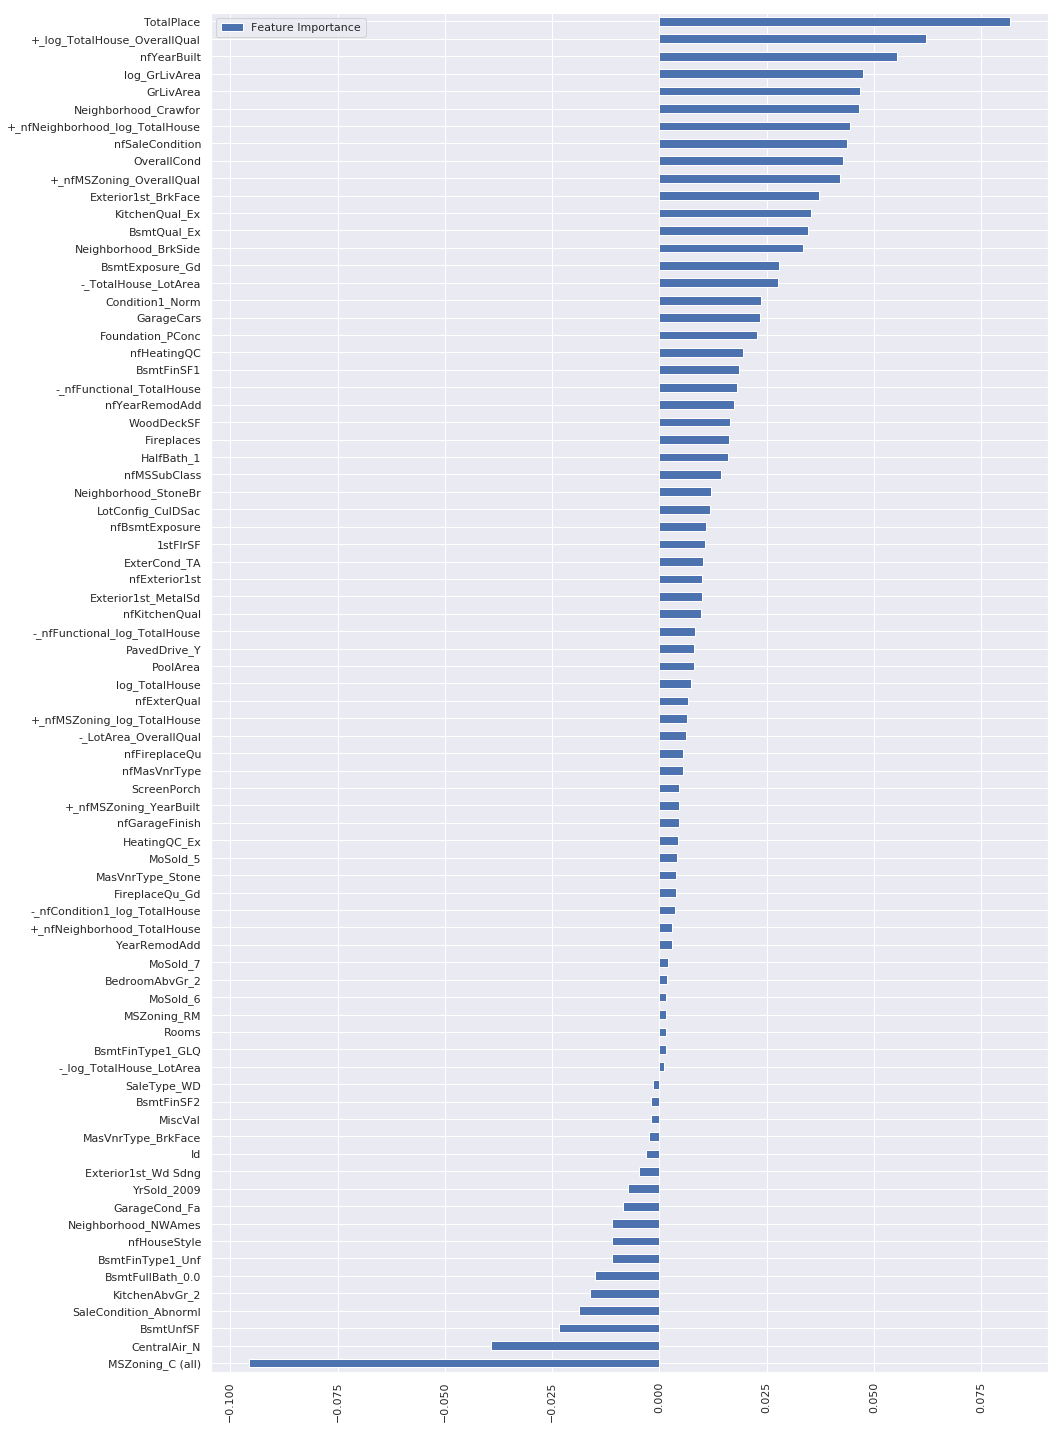

In [43]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_sc,y_log)

FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_},
                        index=df_full_p.columns)
imp_lasso = FI_lasso[np.abs(FI_lasso["Feature Importance"])>0.001].sort_values("Feature Importance")
print("important features in lasso: ",imp_lasso.shape)
imp_lasso.plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

``` however if you try to find important features with Ridge, the shape will be much more ```

In [44]:
pca = PCA(n_components=0.9999, svd_solver='full')

In [45]:
X_train_sc = pca.fit_transform(X_train_sc)
X_test_sc = pca.transform(X_test_sc)

In [46]:
np.savetxt("dataset/X_train.csv", X_train_sc, delimiter=",")
np.savetxt("dataset/X_test.csv", X_test_sc, delimiter=",")
np.savetxt("dataset/y_train.csv", y_train, delimiter=",")